In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("bank.csv", sep=";")

In [3]:
df.head(20)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


Leveraging the lambda & apply function to introduce a new numeric column called "conversion"

This appears to a bank marketing data of sort and the column "y" is the output which is either Yes or No.

In [4]:
df["conversion"] = df["y"].apply(lambda x: 1 if x == "yes" else 0)

In [5]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,conversion
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no,0


From the above table, we now have new column called conversion and it has numeric data - 1 and 0 representing yes and no respectively.

With this the conversion column, we can calculate conversion rate which demostrated below 👇:

In [6]:
total_number_of_row = df.shape[0]

In [7]:
total_number_of_row

4521

In [8]:
conversion_total = df.conversion.sum()

In [9]:
conversion_total

521

In [10]:
rate_of_conversion = (conversion_total/total_number_of_row) * 100

In [11]:
rate_of_conversion.round(2)

11.52

In [12]:
breakdown_by_marital_and_conversion = pd.pivot_table(df, values='y', index='marital', columns='conversion', aggfunc=len)


In [13]:
breakdown_by_marital_and_conversion # where 1 is people that said YES & 0 said NO

conversion,0,1
marital,,
divorced,451,77
married,2520,277
single,1029,167


Using the group function to breakdown conversion by age

In [14]:
age_breakdown = df.groupby(
    by='age'
)['conversion'].sum() / df.groupby(
    by='age'
)['conversion'].count() * 100.0


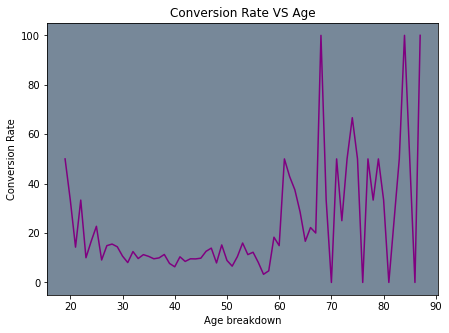

In [15]:
show_chart = age_breakdown.plot(
    figsize=(7, 5),
    color='purple',
    title='Conversion Rate VS Age'
)

show_chart.set_xlabel('Age breakdown')
show_chart.set_ylabel('Conversion Rate')
show_chart.set_facecolor("lightslategray")
plt.show()
